# **FUTURE RETAIL CASE STUDY by H4TF**

In [29]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML

In [30]:
plt.rcParams['figure.figsize'] = (10, 8)
plt.rcParams['figure.dpi'] = 150
plt.rcParams['font.size'] = 16
# plt.style.use("default")
# plt.rcParams["figure.facecolor"] = "white"   # nền toàn figure
# plt.rcParams["axes.facecolor"] = "white"
# sns.set_theme(style="whitegrid")


## **1. Introduction**
*Data and the case study are provided by Heading for the Future Project: Data Analysis
2024*.

*To clarify, this dataset was provided by a competition. In my opinion, the data
quality and authenticity are limited. Nevertheless, I will proceed with the analysis to
 address the business problem defined by the competition host.*

### ***Background***

***Future Retailer*** is an online retail company in the *United States*, offering a wide range of products across multiple categories, including Clothing, Home & Kitchen, Electronics, and Personal Care. This product diversity has contributed significantly to the brand’s growth and market presence over time.

Despite operating for many years, Future Retailer faces challenges in effectively analyzing market trends, customer behavior, and revenue performance. These limitations make it difficult for management to develop data-driven strategies related to product planning, workforce allocation, and market expansion.

This analysis is based on internal data from **Q4 2022**, provided to support strategic decision-making. The objective is to deliver *actionable insights* that help management better understand business performance and recognize the value of data analytics in shaping future growth strategies.

_____________________

### ***Objectives***
* Evaluate Future Retail’s performance in Q4 2022, focusing on product categories, customer behavior, and sales agents.  
* Identify key issues and areas for improvement.  
* Propose data-driven strategies to enhance business performance based on analytical findings.

### ***Table of Content***


## **2. READING DATA**

In [3]:
#Load dataset
dfs = pd.read_excel('C:/Users/Hoang Lan/OneDrive/Máy tính/MIW/Đề/H4TF/H4TF Project/Future-Retail-Business-Case-Analysis/data/01. Future Retailer_Dataset - Copy.xlsx', sheet_name=None)

for name, df in dfs.items():
    print(f"Sheet name: {name}; Shape: {df.shape}")

region_0 = dfs["10.SE Regional Sales"]
region_1 = dfs["11.SE Regional Sales"]
region_2 = dfs["12.SE Regional Sales"]
customer = dfs["Customer"]

# Display basic information about the datasets
display(region_0.head())
display(region_1.head())
display(region_2.head())
display(customer.head())

Sheet name: 10.SE Regional Sales; Shape: (1000, 14)
Sheet name: 11.SE Regional Sales; Shape: (1000, 14)
Sheet name: 12.SE Regional Sales; Shape: (1000, 14)
Sheet name: Customer; Shape: (1000, 13)


,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
0,1001,Hughes,Lewis,1234,Clothing,2022-10-11,16,Delivered,LA,1485,1880,395,Kelly,NaN
1,1002,Gomez,Ali,1235,Home & Kitchen,2022-10-09,11,Delivered,LA,1310,1602,292,Brian,NaN
2,1003,Beck,Mila,1236,Personal Care,2022-10-21,4,Shipped,GA,800,891,91,Terrence,NaN
3,1004,Juarez,Ryleigh,1237,Personal Care,2022-10-26,20,Cancelled,NC,1190,1462,272,Brian,Defective
4,1005,Preston,Leonidas,1238,Electronics,2022-10-22,9,Shipped,GA,470,525,55,Daniel,NaN


,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
0,2001,Hughes,Lewis,1234,Clothing,2022-11-06,9,Shipped,LA,1420,1657,237,Brian,NaN
1,2002,Gomez,Ali,1235,Home & Kitchen,2022-11-03,11,Shipped,LA,1410,1755,345,Kelly,NaN
2,2003,Beck,Mila,1236,Personal Care,2022-11-10,9,Delivered,GA,260,288,28,Brian,NaN
3,2004,Juarez,Ryleigh,1237,Personal Care,2022-11-19,9,Delivered,NC,715,812,97,Priscilla,NaN
4,2005,Preston,Leonidas,1238,Electronics,2022-11-07,13,Shipped,GA,790,978,188,Priscilla,NaN


,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
0,3001,Hughes,Lewis,1234,Clothing,2022-12-24,12,Delivered,LA,470,564,94,Kelly,NaN
1,3002,Gomez,Ali,1235,Home & Kitchen,2022-12-06,2,In Transit,LA,665,777,112,Kelly,NaN
2,3003,Beck,Mila,1236,Personal Care,2022-12-01,7,Delivered,GA,1445,1829,384,Priscilla,NaN
3,3004,Juarez,Ryleigh,1237,Personal Care,2022-12-25,9,Delivered,NC,200,227,27,Daniel,NaN
4,3005,Preston,Leonidas,1238,Electronics,2022-12-29,9,Shipped,GA,1175,1355,180,Brian,NaN


,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Address,City,Postal Code,Sale Price,Phone
0,Hughes,Lewis,1234,Clothing,2022-12-24,12,Delivered,LA,49458 Glenwood Avenue,Shreveport,71101,564,504-870-1437
1,Gomez,Ali,1235,Home & Kitchen,2022-12-06,2,In Transit,LA,11591 River Road,Covington,70433,777,337-400-1567
2,Beck,Mila,1236,Personal Care,2022-12-01,7,Delivered,GA,48087 Jackson Street,Atlanta,30303,1829,404-573-7088
3,Juarez,Ryleigh,1237,Personal Care,2022-12-25,9,Delivered,NC,46798 Hillcrest Avenue,Columbia,29201,227,252-325-9603
4,Preston,Leonidas,1238,Electronics,2022-12-29,9,Shipped,GA,65693 Mulberry Street,Avondale Estates,30002,1355,404-383-9724


We can see that the dataset contains 3 sheets, including:
* 10.SE Regional Sales (1000 rows, 14 colums): represent order detail in October 2022
* 11.SE Regional Sales (1000 rows, 14 colums): represent order detail in November 2022
* 12.SE Regional Sales (1000 rows, 14 colums): represent order detail in December 2022
* Customer (1000 rows, 13 colums): contain meta data about each customer

I'll merge the 3 dataset of Regional Sales into 1 dataframe

Also, look into the data, we can see that the "Customer" dataset only contain customer with their the order in Dec

In [4]:
# Remove extra spaces in column names
region_0.rename(columns={'Order ID ': 'Order ID', 'Total Profit ': 'Total Profit'}, inplace=True)
region_1.rename(columns={'Order ID ': 'Order ID', 'Total Profit ': 'Total Profit'}, inplace=True)
region_2.rename(columns={'Order ID ': 'Order ID', 'Total Profit ': 'Total Profit'}, inplace=True)

# Combine regional sales data into a single DataFrame
sale_df = pd.concat([region_0, region_1, region_2], ignore_index=True)

In [5]:
# Check data quality
def check_data_quality(df, name):
    print(f"Data Quality Report for {name}")

    print(f"Duplicated Rows: {df.duplicated().sum()}")

    print("\nData infor:")
    print(df.info())

    print("\nStatistical Summary:")
    display(df.describe(include='all'))

    print("\n Unique Values:")
    display(df.nunique())

    print("\n" + "=" * 40 + "\n")


In [6]:
check_data_quality(sale_df, "Sales Data")

Data Quality Report for Sales Data
Duplicated Rows: 0

Data infor:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order ID             3000 non-null   int64         
 1   Customer Last Name   3000 non-null   object        
 2   Customer First Name  3000 non-null   object        
 3   Customer ID          3000 non-null   int64         
 4   Product Category     3000 non-null   object        
 5   Order Date           3000 non-null   datetime64[ns]
 6   Quantity Ordered     3000 non-null   int64         
 7   Order Status         3000 non-null   object        
 8   State                3000 non-null   object        
 9   Manufacturer Price   3000 non-null   int64         
 10  Sale Price           3000 non-null   int64         
 11  Total Profit         3000 non-null   int64         
 12  Sales Agent          30

,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
count,3000.000000,3000,3000,3000.000000,3000,3000,3000.000000,3000,3000,3000.000000,3000.000000,3000.000000,3000,309
unique,NaN,629,607,NaN,7,NaN,NaN,4,6,NaN,NaN,NaN,5,5
top,NaN,Holt,Shiloh,NaN,Electronics,NaN,NaN,Delivered,LA,NaN,NaN,NaN,Priscilla,Received Wrong Item
freq,NaN,15,18,NaN,474,NaN,NaN,1205,537,NaN,NaN,NaN,659,73
mean,2500.500000,NaN,NaN,1731.996000,NaN,2022-11-15 10:03:50.400000,10.503333,NaN,NaN,751.140000,901.574667,150.434667,NaN,NaN
min,1001.000000,NaN,NaN,1234.000000,NaN,2022-10-01 00:00:00,1.000000,NaN,NaN,10.000000,11.000000,1.000000,NaN,NaN
25%,1750.750000,NaN,NaN,1482.750000,NaN,2022-10-23 00:00:00,6.000000,NaN,NaN,375.000000,445.750000,68.000000,NaN,NaN
50%,2500.500000,NaN,NaN,1731.500000,NaN,2022-11-15 00:00:00,11.000000,NaN,NaN,750.000000,891.000000,136.500000,NaN,NaN
75%,3250.250000,NaN,NaN,1981.250000,NaN,2022-12-08 00:00:00,15.000000,NaN,NaN,1125.000000,1347.750000,220.000000,NaN,NaN
max,4000.000000,NaN,NaN,2231.000000,NaN,2022-12-31 00:00:00,20.000000,NaN,NaN,1500.000000,1935.000000,441.000000,NaN,NaN



 Unique Values:


Order ID               3000
Customer Last Name      629
Customer First Name     607
Customer ID             998
Product Category          7
Order Date               92
Quantity Ordered         20
Order Status              4
State                     6
Manufacturer Price      299
Sale Price             1480
Total Profit            412
Sales Agent               5
Return Reason             5
dtype: int64

In [7]:
sale_df["Return Reason"] = sale_df["Return Reason"].fillna("No Return")
display(sale_df[['Return Reason']].drop_duplicates().reset_index(drop=True))

,Return Reason
0,No Return
1,Defective
2,Late Delivery
3,Quality Issue
4,Received Wrong Item
5,Unsatisfied


Regarding ***Sales data***, we can see that the data is relatively clean. Some noticeable points include:
* **3,000** orders over 3 months (Oct, Nov, Dec 2022)
* No duplicate rows
* Only 'Return Reason' field contains NaN values. I replaced NaN value with "No Reason" to avoid logic issues. 

Columns with notable unique counts include:

In [8]:
print(sale_df['Product Category'].drop_duplicates().tolist())
print(sale_df['Order Status'].drop_duplicates().tolist())
print(sale_df['State'].drop_duplicates().tolist())
print(sale_df['Sales Agent'].drop_duplicates().tolist())
print(sale_df['Return Reason'].drop_duplicates().tolist())

['Clothing', 'Home & Kitchen', 'Personal Care', 'Electronics', 'Pets', 'Sports & Outdoors', 'Books']
['Delivered', 'Shipped', 'Cancelled', 'In Transit']
['LA', 'GA', 'NC', 'SC', 'AL', 'FL']
['Kelly', 'Brian', 'Terrence', 'Daniel', 'Priscilla']
['No Return', 'Defective', 'Late Delivery', 'Quality Issue', 'Received Wrong Item', 'Unsatisfied']


In [9]:
check_data_quality(customer, "Customer Data")

Data Quality Report for Customer Data
Duplicated Rows: 0

Data infor:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Customer Last Name   1000 non-null   object        
 1   Customer First Name  1000 non-null   object        
 2   Customer ID          1000 non-null   int64         
 3   Product Category     1000 non-null   object        
 4   Order Date           1000 non-null   datetime64[ns]
 5   Quantity Ordered     1000 non-null   int64         
 6   Order Status         1000 non-null   object        
 7   State                1000 non-null   object        
 8   Address              1000 non-null   object        
 9   City                 1000 non-null   object        
 10  Postal Code          1000 non-null   int64         
 11  Sale Price           1000 non-null   int64         
 12  Phone                

,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Address,City,Postal Code,Sale Price,Phone
count,1000,1000,1000.00000,1000,1000,1000.000000,1000,1000,1000,1000,1000.000000,1000.000000,1000
unique,629,607,NaN,7,NaN,NaN,4,6,998,26,NaN,NaN,1000
top,Holt,Shiloh,NaN,Electronics,NaN,NaN,Delivered,LA,63913 Valley View Drive,Birmingham,NaN,NaN,504-870-1437
freq,5,6,NaN,158,NaN,NaN,400,179,2,88,NaN,NaN,1
mean,NaN,NaN,1731.99600,NaN,2022-12-15 22:50:52.800000,10.567000,NaN,NaN,NaN,NaN,38974.463000,890.427000,NaN
min,NaN,NaN,1234.00000,NaN,2022-12-01 00:00:00,1.000000,NaN,NaN,NaN,NaN,27514.000000,11.000000,NaN
25%,NaN,NaN,1482.75000,NaN,2022-12-08 00:00:00,6.000000,NaN,NaN,NaN,NaN,29601.000000,431.750000,NaN
50%,NaN,NaN,1731.50000,NaN,2022-12-16 00:00:00,11.000000,NaN,NaN,NaN,NaN,33160.000000,897.000000,NaN
75%,NaN,NaN,1981.25000,NaN,2022-12-24 00:00:00,15.000000,NaN,NaN,NaN,NaN,36602.000000,1311.250000,NaN
max,NaN,NaN,2231.00000,NaN,2022-12-31 00:00:00,20.000000,NaN,NaN,NaN,NaN,71101.000000,1904.000000,NaN



 Unique Values:


Customer Last Name      629
Customer First Name     607
Customer ID             998
Product Category          7
Order Date               31
Quantity Ordered         20
Order Status              4
State                     6
Address                 998
City                     26
Postal Code              27
Sale Price              767
Phone                  1000
dtype: int64

In [10]:
filter = customer['Customer ID'].groupby(customer['Customer ID']).count() > 1
customers_with_duplicates = customer['Customer ID'].groupby(customer['Customer ID']).count()[filter].index.tolist()
duplicate_customers = customer[customer['Customer ID'].isin(customers_with_duplicates)]

duplicate_customers

,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Address,City,Postal Code,Sale Price,Phone
139,Shepherd,Charli,1373,Clothing,2022-12-05,20,In Transit,SC,81712 Main Street,Greenville,29601,591,803-980-5972
354,Vega,Blake,1588,Books,2022-12-02,5,Delivered,GA,63913 Valley View Drive,Columbus,31901,329,762-827-9216
381,Shepherd,Charli,1373,Sports & Outdoors,2022-12-03,17,Shipped,SC,81712 Main Street,Charleston,29401,579,803-759-6965
858,Vega,Blake,1588,Personal Care,2022-12-03,17,Shipped,GA,63913 Valley View Drive,Avondale Estates,30002,214,678-878-1111


Regarding ***Customer data***, we can see that the data is also clean. Some noticeable points include:
* **1,000** records in this dataset with **988** unique customers, indicating that this table is not a strict dimension table (customers may appear multiple times)
* Records contain data from **December 2022** only. 
* No duplicate rows were detected.  
* No columns contain missing values (NaN). 

I also noticed 'Customer' dataset contains **duplicated transactional attributes** such as 'Order Date', 'Product Category', 'Sales Price', etc. Since the sales table already provides full transactional history from October to December, these fields were **excluded** from customer analysis to avoid data duplication and temporal inconsistency. The customer table was treated as a dimension table containing static customer attributes only.

In [11]:
customer.drop(columns=[ "Product Category", "Order Date", "Quantity Ordered", "Order Status", "State", "Sale Price"], axis=1, inplace=True)
check_data_quality(customer, "Customer Data After Dropping Unnecessary Columns")

Data Quality Report for Customer Data After Dropping Unnecessary Columns
Duplicated Rows: 0

Data infor:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer Last Name   1000 non-null   object
 1   Customer First Name  1000 non-null   object
 2   Customer ID          1000 non-null   int64 
 3   Address              1000 non-null   object
 4   City                 1000 non-null   object
 5   Postal Code          1000 non-null   int64 
 6   Phone                1000 non-null   object
dtypes: int64(2), object(5)
memory usage: 54.8+ KB
None

Statistical Summary:


,Customer Last Name,Customer First Name,Customer ID,Address,City,Postal Code,Phone
count,1000,1000,1000.00000,1000,1000,1000.000000,1000
unique,629,607,NaN,998,26,NaN,1000
top,Holt,Shiloh,NaN,63913 Valley View Drive,Birmingham,NaN,504-870-1437
freq,5,6,NaN,2,88,NaN,1
mean,NaN,NaN,1731.99600,NaN,NaN,38974.463000,NaN
std,NaN,NaN,288.21378,NaN,NaN,15074.135668,NaN
min,NaN,NaN,1234.00000,NaN,NaN,27514.000000,NaN
25%,NaN,NaN,1482.75000,NaN,NaN,29601.000000,NaN
50%,NaN,NaN,1731.50000,NaN,NaN,33160.000000,NaN
75%,NaN,NaN,1981.25000,NaN,NaN,36602.000000,NaN



 Unique Values:


Customer Last Name      629
Customer First Name     607
Customer ID             998
Address                 998
City                     26
Postal Code              27
Phone                  1000
dtype: int64

## **3. Exploratory Data Analysis**

### Product Performance Monitor

In [12]:
print(sale_df.columns.tolist())
print(customer.columns.tolist())

['Order ID', 'Customer Last Name', 'Customer First Name', 'Customer ID', 'Product Category', 'Order Date', 'Quantity Ordered', 'Order Status', 'State', 'Manufacturer Price', 'Sale Price', 'Total Profit', 'Sales Agent', 'Return Reason']
['Customer Last Name', 'Customer First Name', 'Customer ID', 'Address', 'City', 'Postal Code', 'Phone']


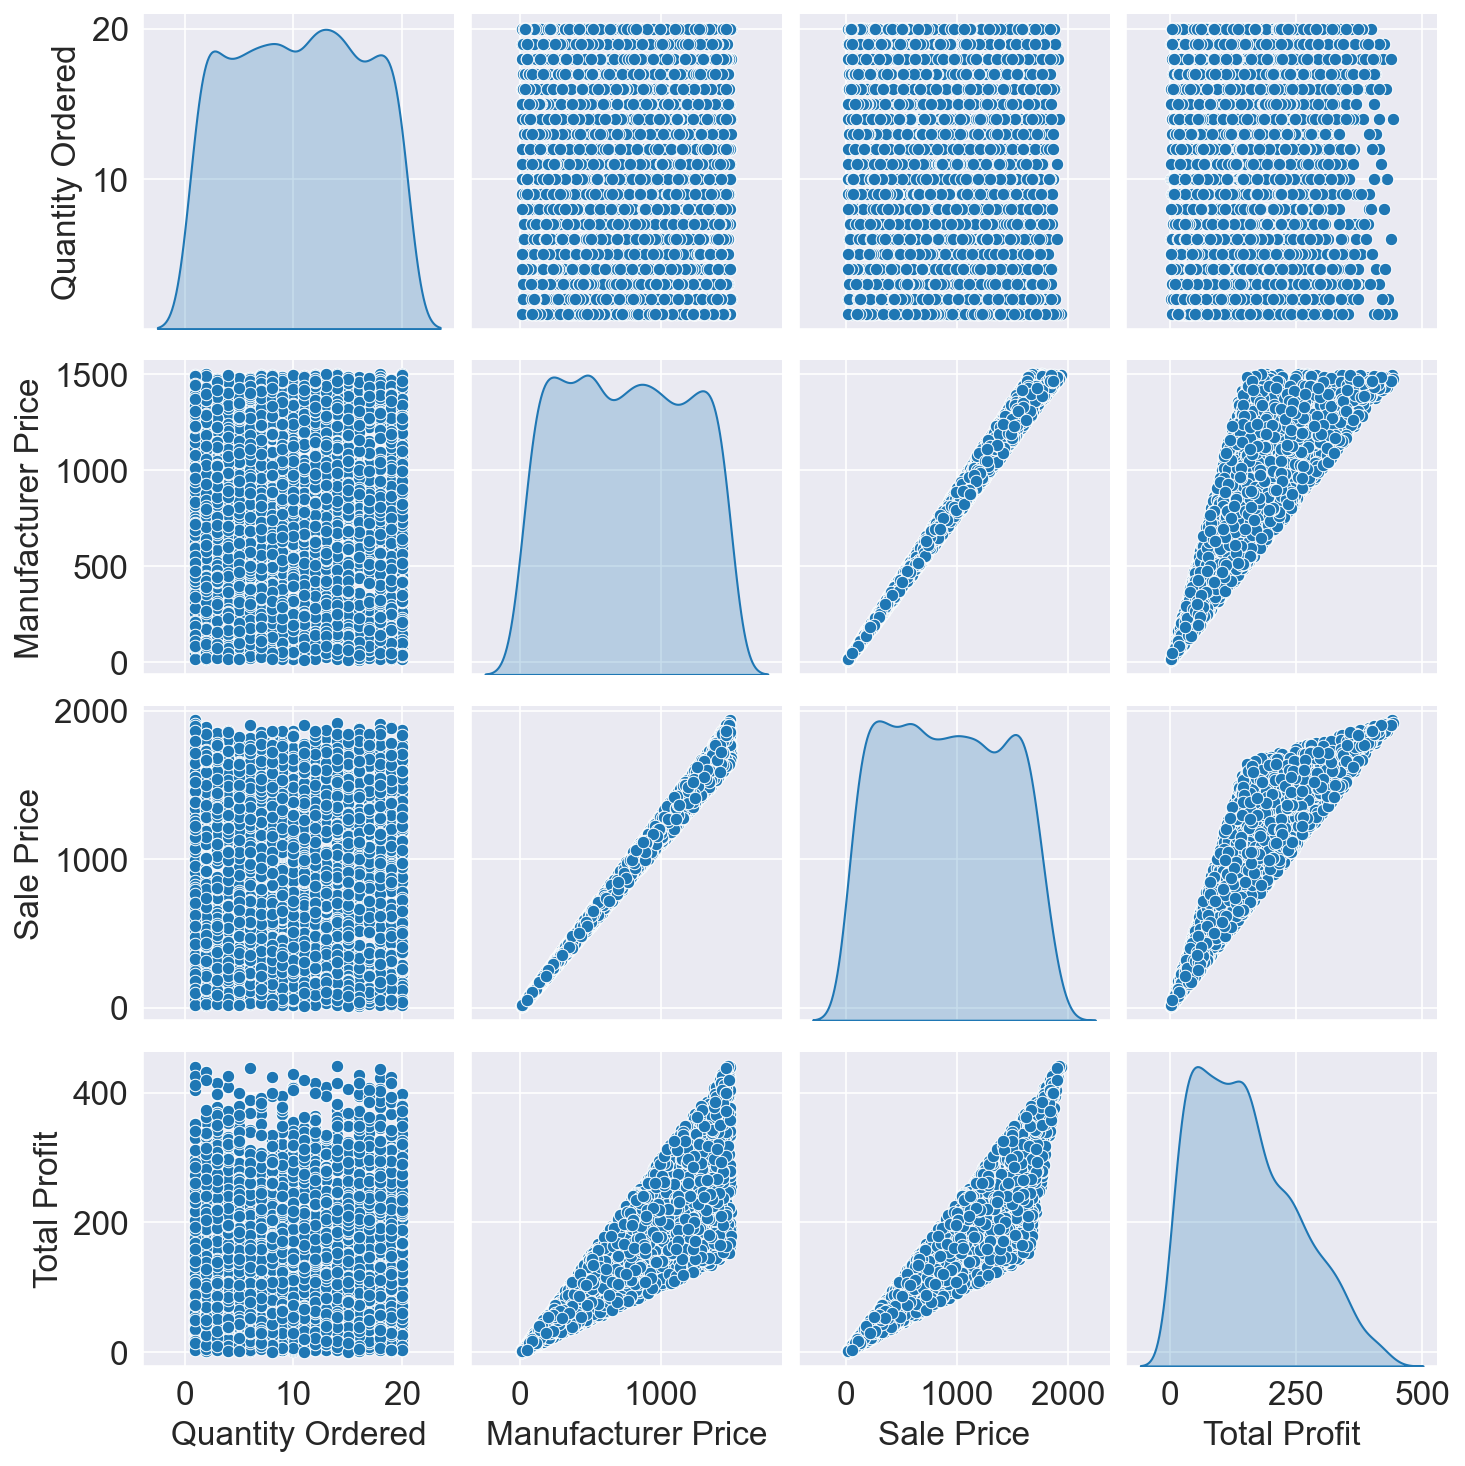

In [13]:
distribution_sale = sale_df[["Quantity Ordered", "Manufacturer Price", "Sale Price",
                             "Total Profit"]]

sns.pairplot(distribution_sale, diag_kind= 'kde')
plt.show()

In [23]:
sale_df['calculated_profit'] = sale_df['Sale Price'] - sale_df['Manufacturer Price']
display(sale_df[sale_df['calculated_profit'] != sale_df['Total Profit']])

,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason,calculated_profit


### Product Performance Analysis

In [38]:
# Calculate metrics

product_agg = sale_df.groupby('Product Category').agg(
    total_order = ('Order ID', 'nunique'),
    total_profit = ('Total Profit', 'sum'),
    avg_profit = ('Total Profit', 'mean'),
    total_quantity = ('Quantity Ordered', 'sum'),
    avg_quantity = ('Quantity Ordered', 'mean'),
    total_cost = ('Manufacturer Price', 'sum'),
    avg_manu_price = ('Manufacturer Price', 'mean'),
    total_sale = ('Sale Price', 'sum'),
    avg_sale_price = ('Sale Price', 'mean')
).reset_index()

product_agg['gross_margin'] = ((product_agg['total_profit'] /
                                product_agg['total_sale']) * 100 )

product_agg['profit_per_unit'] = (product_agg['total_profit'] /
                                  product_agg['total_quantity'])

product_agg.sort_values(['total_order'], ascending = [True],
                        inplace=True)

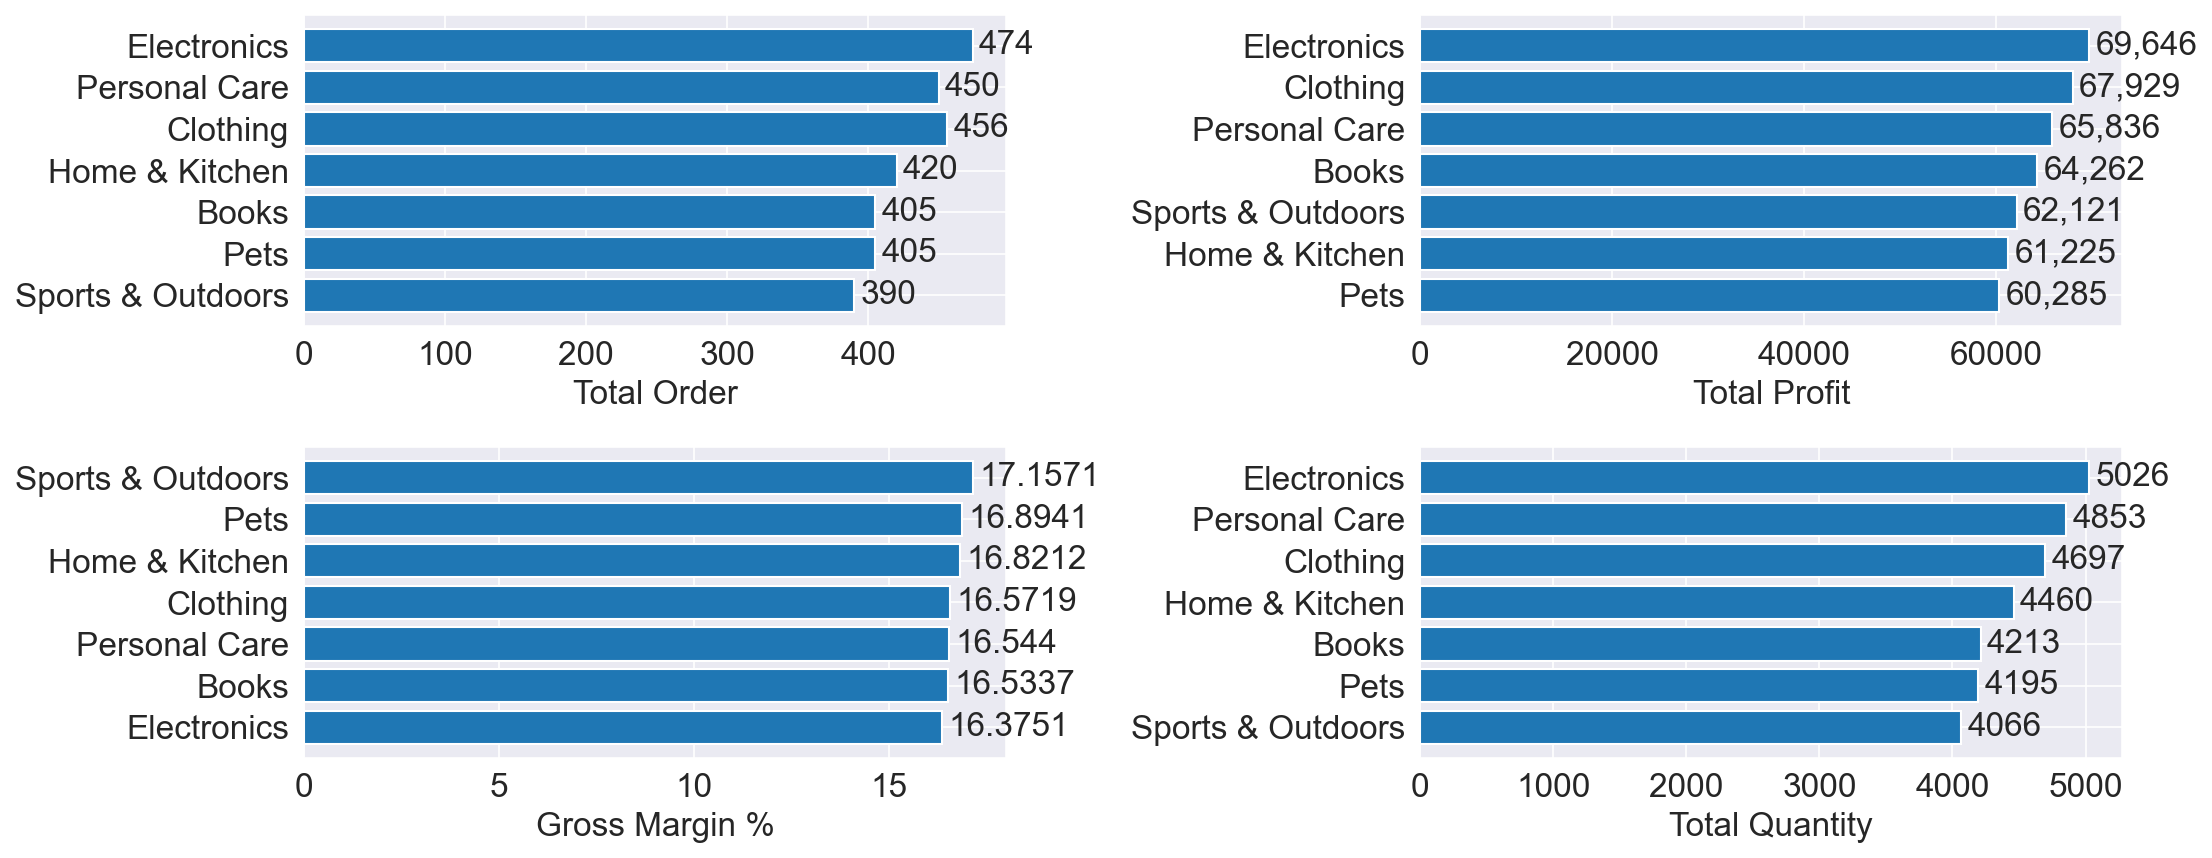

In [42]:
fig, axes = plt.subplots(2, 2, figsize=(15,6))

# Plot 1: Total Order
bars1 = axes[0,0].barh(
    product_agg['Product Category'],
    product_agg['total_order']
)
axes[0,0].set_xlabel('Total Order')
axes[0,0].bar_label(bars1, padding=3)

# Plot 2: Total Profit
product_agg.sort_values(['total_profit'], ascending = [True], inplace= True)
bars2 = axes[0,1].barh(
    product_agg['Product Category'],
    product_agg['total_profit']
)
axes[0,1].set_xlabel('Total Profit')
axes[0,1].bar_label(bars2, fmt='{:,.0f}', padding=3)

# Plot 3
product_agg.sort_values(['gross_margin'], ascending = True, inplace=True)
bars3 = axes[1,0].barh(
    product_agg['Product Category'],
    product_agg['gross_margin']
)
axes[1,0].set_xlabel('Gross Margin %')
axes[1,0].bar_label(bars3, padding=3)

# Plot 4
product_agg.sort_values(['total_quantity'], ascending = True, inplace=True)
bars5 = axes[1,1].barh(
    product_agg['Product Category'],
    product_agg['total_quantity']
)
axes[1,1].set_xlabel('Total Quantity')
axes[1,1].bar_label(bars5, padding=3)

plt.tight_layout()
plt.show()


By looking at these key metrics, we can see that:
* **'Electronics', 'Clothing', 'Personal Care'** are the top 3 most sold and making most
profit. However, they don't have good Gross Margin % and 'Electronics' even has the
lowest margin.
* Differently, **'Sports & Outdoors', 'Pets'** are top 2 of lowest number of orders but
 they have the highest gross-margin.

In [17]:
sale_df

,Order ID,Customer Last Name,Customer First Name,Customer ID,Product Category,Order Date,Quantity Ordered,Order Status,State,Manufacturer Price,Sale Price,Total Profit,Sales Agent,Return Reason
0,1001,Hughes,Lewis,1234,Clothing,2022-10-11,16,Delivered,LA,1485,1880,395,Kelly,No Return
1,1002,Gomez,Ali,1235,Home & Kitchen,2022-10-09,11,Delivered,LA,1310,1602,292,Brian,No Return
2,1003,Beck,Mila,1236,Personal Care,2022-10-21,4,Shipped,GA,800,891,91,Terrence,No Return
3,1004,Juarez,Ryleigh,1237,Personal Care,2022-10-26,20,Cancelled,NC,1190,1462,272,Brian,Defective
4,1005,Preston,Leonidas,1238,Electronics,2022-10-22,9,Shipped,GA,470,525,55,Daniel,No Return
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2995,3996,Robbins,Crew,2227,Pets,2022-12-23,12,Shipped,LA,1465,1865,400,Daniel,No Return
2996,3997,Salinas,Willow,2228,Books,2022-12-25,4,Cancelled,GA,890,1050,160,Kelly,Quality Issue
2997,3998,Bond,Malachi,2229,Pets,2022-12-23,20,Shipped,LA,825,1059,234,Daniel,No Return
2998,3999,Willis,Patrick,2230,Sports & Outdoors,2022-12-14,16,Shipped,LA,875,1116,241,Priscilla,No Return
